In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('renttherunway_without_missing_values.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date', 'band_size',
       'cup_letter', 'cup_diff', 'cup_size', 'weight_lbs', 'weight_kgs',
       'height_feet', 'height_inches', 'height_cms', 'review_year',
       'review_month', 'review_day'],
      dtype='object')

In [4]:
#Drop unneeded columns
data1 = data.drop(["height_inches","height_feet","weight_lbs","Unnamed: 0"],axis=1)

In [5]:
data1

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,...,review_date,band_size,cup_letter,cup_diff,cup_size,weight_kgs,height_cms,review_year,review_month,review_day
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,...,"April 20, 2016",34.0,D,4.0,38.0,62.142104,172.72,2016,4,20
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,...,"June 18, 2013",34.0,B,2.0,36.0,59.874144,167.64,2013,6,18
2,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,...,"February 12, 2014",34.0,C,3.0,37.0,61.234920,165.10,2014,2,12
3,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,...,"September 26, 2016",34.0,B,2.0,36.0,65.770840,175.26,2016,9,26
4,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,...,"April 30, 2016",32.0,B,2.0,34.0,62.595696,172.72,2016,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146376,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,...,"May 18, 2016",34.0,E,5.0,39.0,63.502880,175.26,2016,5,18
146377,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,...,"September 30, 2016",32.0,C,3.0,35.0,45.359200,154.94,2016,9,30
146378,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",...,"March 4, 2016",36.0,A,1.0,37.0,61.234920,172.72,2016,3,4
146379,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,...,"November 25, 2015",36.0,C,3.0,39.0,74.842680,167.64,2015,11,25


In [220]:
data1[:1001]

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,...,band_size,cup_letter,cup_diff,cup_size,weight_kgs,height_cms,review_year,review_month,review_day,binaryfit
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,...,34.0,D,4.0,38.0,62.142104,172.72,2016,4,20,yes
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,...,34.0,B,2.0,36.0,59.874144,167.64,2013,6,18,yes
2,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,...,34.0,C,3.0,37.0,61.234920,165.10,2014,2,12,yes
3,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,...,34.0,B,2.0,36.0,65.770840,175.26,2016,9,26,yes
4,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,...,32.0,B,2.0,34.0,62.595696,172.72,2016,4,30,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,fit,279716,32d,2722297,127lbs,10.0,everyday,I loved the pockets and back detail. I worn i...,hourglass,"Great piece, very versatile",...,32.0,D,4.0,36.0,57.606184,167.64,2017,10,20,yes
997,fit,453234,34dd,1484078,150lbs,10.0,wedding,Dress was a little loose and wasn't as fitted ...,hourglass,Cute and flirty,...,34.0,E,5.0,39.0,68.038800,175.26,2015,12,28,yes
998,fit,401771,34ddd/e,130259,135lbs,8.0,wedding,Fits true to size. I have a larger chest (34DD...,full bust,Wore this dress for a wedding on July 4th!,...,34.0,H,8.0,42.0,61.234920,162.56,2017,9,19,yes
999,fit,997686,34b,1082384,125lbs,8.0,party,I loved this dress!!! It fit perfect everywher...,athletic,It was the last company Christmas party my hus...,...,34.0,B,2.0,36.0,56.699000,157.48,2016,7,18,yes


In [6]:
data1.groupby('item_id')['fit'].count().sort_values(ascending=False)

item_id
126335     1527
123793     1354
174086     1273
127865     1116
145906     1111
           ... 
405944        1
2180111       1
2399913       1
2399391       1
2625237       1
Name: fit, Length: 5736, dtype: int64

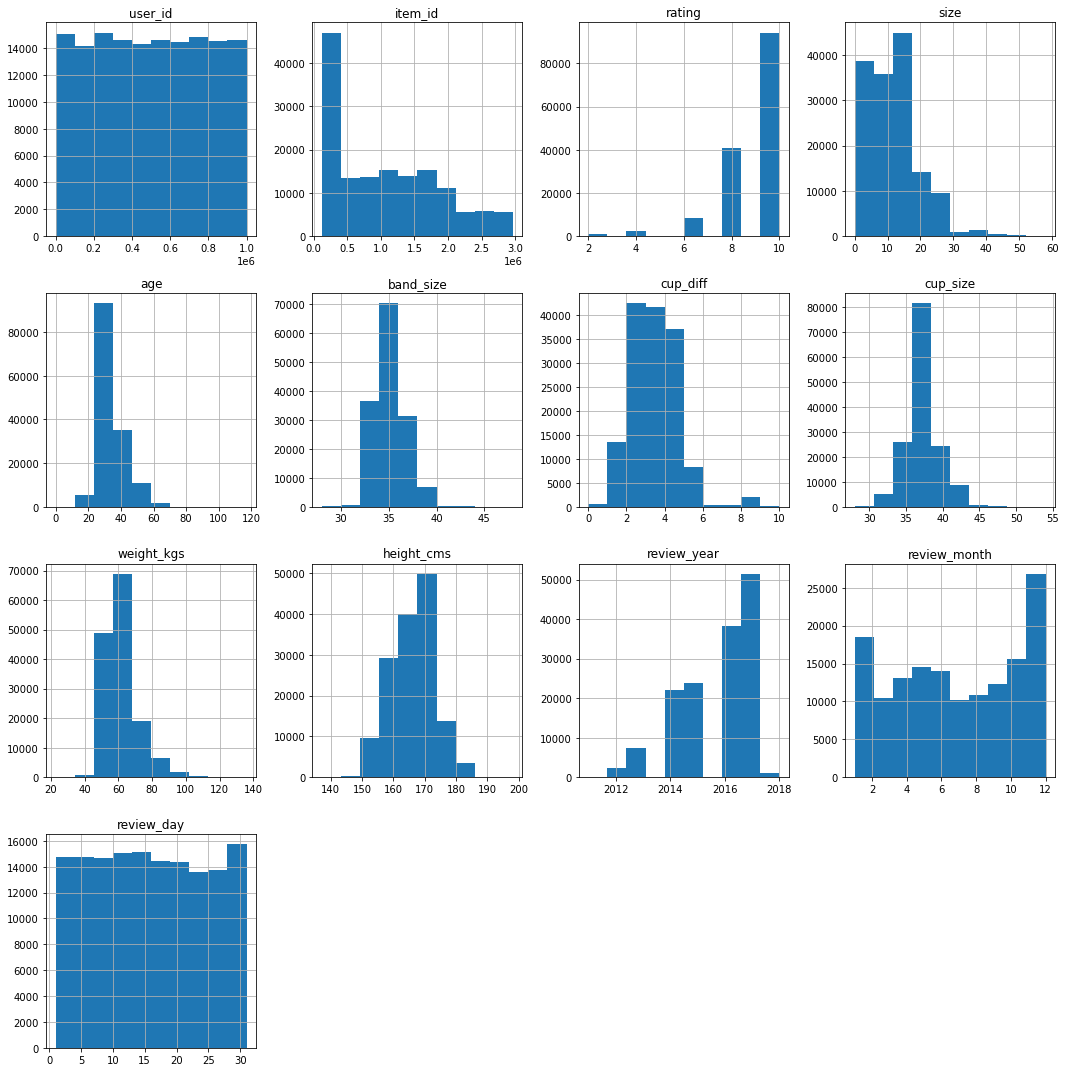

In [7]:
data1.hist(figsize=(15,15))
plt.tight_layout()

<AxesSubplot:>

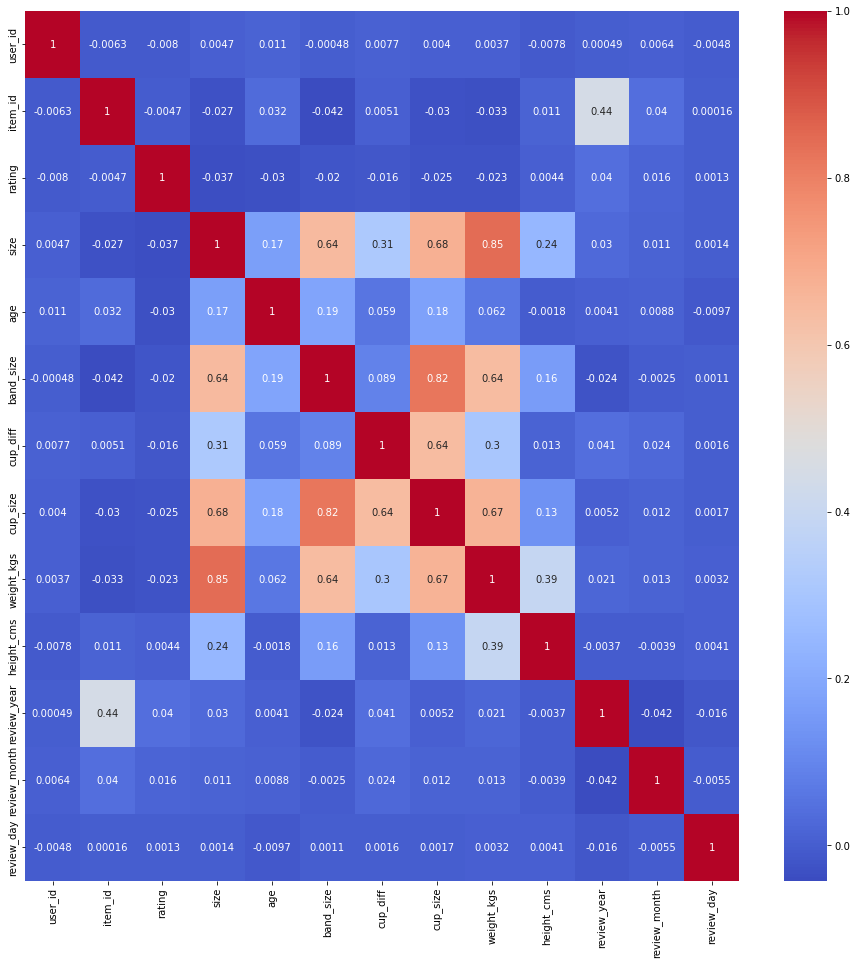

In [8]:
plt.figure(figsize=(16, 16))
sns.heatmap(data1.corr(), annot = True, cmap="coolwarm")

In [203]:
from sklearn.preprocessing import StandardScaler

In [121]:
def binaryfit(row):
    fit = row["fit"]
    if fit =="fit":
        return "yes"
    else:
        return "No"

In [122]:
data1["binaryfit"] = data1.apply(lambda row: binaryfit(row), axis=1)

In [89]:
data1["binaryfit"].value_counts()

yes    107733
No      38648
Name: binaryfit, dtype: int64

In [90]:
data2 = data1[data1["item_id"]==126335]
data2

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,...,band_size,cup_letter,cup_diff,cup_size,weight_kgs,height_cms,review_year,review_month,review_day,binaryfit
2,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,...,34.0,C,3.0,37.0,61.234920,165.10,2014,2,12,yes
55,large,383116,34d,126335,128lbs,10.0,formal affair,"I normally wear a 4, but ended up wearing the ...",full bust,"The dress was fun, comfortable and pretty.",...,34.0,D,4.0,38.0,58.059776,172.72,2014,6,8,No
160,large,88691,34b,126335,140lbs,10.0,wedding,My back-up size for the original dress that I ...,pear,Wish I had somewhere else to go....,...,34.0,B,2.0,36.0,63.502880,157.48,2013,8,15,No
219,large,557419,34b,126335,145lbs,6.0,wedding,Dress was more pinkish than the picture. I wo...,athletic,RTR is very easy to rent and send back.There i...,...,34.0,B,2.0,36.0,65.770840,162.56,2013,11,25,No
352,small,726303,36c,126335,190lbs,6.0,formal affair,"Overall, I loved this dress and I thought it f...",hourglass,A glitzy showstopper that made me stand out at...,...,36.0,C,3.0,39.0,86.182480,177.80,2013,10,17,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145935,large,550713,34b,126335,130lbs,6.0,formal affair,"Runs big, just like the rest of the comments s...",hourglass,Got a ton of compliments on this gorgeous & cl...,...,34.0,B,2.0,36.0,58.966960,162.56,2012,10,14,No
145988,fit,902767,34b,126335,155lbs,8.0,party,I wore this to my office holiday party and eve...,pear,So sparkly! Perfect for a holiday or NYE party.,...,34.0,B,2.0,36.0,70.306760,180.34,2013,9,13,yes
146223,fit,306019,38d+,126335,217lbs,10.0,formal affair,I absolutely loved this dress! I received comp...,apple,I was aiming for a vintage movie star look for...,...,38.0,E,5.0,43.0,98.429464,162.56,2014,11,18,yes
146345,large,827283,32c,126335,125lbs,10.0,wedding,This dress was beautiful!! Wore it to a cockta...,athletic,"Gorgeous dress!! 1st experience with RTR, but ...",...,32.0,C,3.0,35.0,56.699000,162.56,2014,7,1,No


In [177]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [178]:
# Get the predictors and target the X and y variables from the dataset

X = data3[['size', 'age', 'band_size', 'weight_kgs','height_cms']]
y = data3['binaryfit']

In [211]:
# Get the predictors and target the X and y variables from the dataset

X = data_prep
y = data1['fit']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, 
                                                          stratify = y,
                                                          random_state = 1)

In [213]:
# Instantiate a decision tree dt and criterion
dt = DecisionTreeClassifier(criterion = 'entropy',  random_state = 1)
# dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

In [214]:
dt.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [215]:
y_pred = dt.predict(X_test)

In [216]:
y_pred

array(['small', 'fit', 'fit', ..., 'fit', 'fit', 'fit'], dtype=object)

In [217]:
dt.classes_

array(['fit', 'large', 'small'], dtype=object)

In [218]:
# Print the accuracy of labels predicted.
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.66

In [219]:
from sklearn.metrics import classification_report

class_labels = data1['fit'].unique()
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

         fit       0.75      0.86      0.80     32320
       small       0.20      0.12      0.15      5708
       large       0.24      0.14      0.18      5887

    accuracy                           0.66     43915
   macro avg       0.39      0.37      0.37     43915
weighted avg       0.61      0.66      0.63     43915



In [172]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

clf = MultinomialNB()
# clf = GaussianNB()
#clf = GaussianNB()
clf.fit(X_train, y_train) 

MultinomialNB()

In [173]:
# Get predictions for test set
y_pred = clf.predict(X_test)

# get true labels from test set
y_true = y_test.ravel()

# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of NB is', accuracy_score(y_true, y_pred)*100,'%')

Accuracy of NB is 68.8238642832745 %
